# NRC-33 CAP EB Model 

The nominal target for these observations will be the HD 140982 system. While this target’s visibility window is misaligned with the expected commissioning dates (see visibility above), we also have a backup target: HD 5687.

HD 140982A shows (0.86%) eclipses in archival data from the KELT transit survey. The KELT pixel scale (23”/px) includes blended sources in its lightcurves. Therefore, ground-based photometry was performed on the University of Arizona 90-inch telescope to verify that HD 140982 was not a fainter background eclipsing binary blended by HD 140982. The 90-inch observations confirm that HD 140982 is indeed the eclipsing binary and hasa primary eclipse of 2%. TESS is expected to collect lightcurves of the HD 140982 system in sectors 22, 23, and 24, all with camera 3. These observations are expected to be in February through April 2020 according to the WebTESS Viewing Tool accessed on April 19, 2019. TESS will provide high precision lightcurves to constrain the variability and eclipse timing ephemeris of the system but will experience similar blending as KELT.

Radial velocity observations show that HD 140982B is a late M-dwarf companion.The system is relatively bright (K=7.6), shows a short 1.3 hour eclipse, and has a high ecliptic latitude of 73 degrees. Data collection will take 4 hours for the exposure itself to include 1.7 hours before eclipse, 1.3 hours during eclipse and 1 hour after. The total time charged with overhead is 4.84 hours.

A backup eclipsing binary that has complementary visibility is HD 5687/TIC 51912829. It was originally flagged as a planet candidate and then later classified as an eclipsing binary. Its eclipse depth is smaller (0.3% in TESS but this is potentially diluted by nearby sources). AO imaging shows no bright neighboring stars. Because of the similar orbital period, eclipse duration and magnitude, this target can be substituted for the primary target with no significant impact to the duration or data volume (the much smaller eclipse depth makes this a less desirable target).

### Import Libraries

In [1]:
from astropy.io import fits, ascii
from astropy.table import Table
from astropy.visualization import simple_norm, imshow_norm
from astropy import units as u
import ellc
import batman
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 300
from matplotlib.ticker import (AutoMinorLocator)
from matplotlib import colors
import matplotlib.cm as cmx
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

# WASP-4

In [2]:
# ----------  BATMAN Model  ----------

params_wasp4 = batman.TransitParams()       # object to store transit parameters
params_wasp4.t0 = 54740.62                  # epoch of eclipse center
params_wasp4.per = 1.3382320363             # orbital period
params_wasp4.rp = 0.15                      # planet/EB radius (in units of stellar radii)
params_wasp4.a = 5.4419                     # semi-major axis (in units of stellar radii)
params_wasp4.inc = 88.5                     # orbital inclination (in degrees)
params_wasp4.ecc = 0                        # eccentricity
params_wasp4.w = 0                          # longitude of periastron (in degrees)
params_wasp4.fp = 0                         # planet-to-star flux ratio
params_wasp4.t_secondary = 0                # central eclipse time
params_wasp4.limb_dark = "quadratic"        # limb darkening model`b
params_wasp4.u = [0.0, 0]  # limb darkening coefficients (ExoFAST)
times_wasp4_batman = np.linspace(54740.539760, 54740.727228, 104)
m_wasp4 = batman.TransitModel(params_wasp4, times_wasp4_batman)
flux_wasp4_batman = m_wasp4.light_curve(params_wasp4)

In [3]:
# ----------  JKTEBOP Model  ----------
wasp4_out = ascii.read("wasp4.out")
times_wasp4_jktebop = wasp4_out["TIME"]
obs_flux_wasp4_jktebop = 2 - 2.512**wasp4_out["MAGNITUDE"]
flux_wasp4_jktebop = 2 - 2.512**wasp4_out["MODEL"]

In [4]:
# ----------  ELLC Model  ----------

r_1 = 1/params_wasp4.a 
r_2 = r_1*params_wasp4.rp
t_zero = params_wasp4.t0
period = params_wasp4.per
incl = params_wasp4.inc
ldc_1 = params_wasp4.u 
ld_1 = 'quad'
sbratio = 0 

flux_wasp4_ellc = ellc.lc(times_wasp4_jktebop,radius_1=r_1, radius_2=r_2,incl=incl,sbratio=sbratio,t_zero=t_zero,period=period,
                          ld_1=ld_1, ldc_1=ldc_1,shape_1='sphere',shape_2='sphere',
                          grid_1='fine',grid_2='fine')

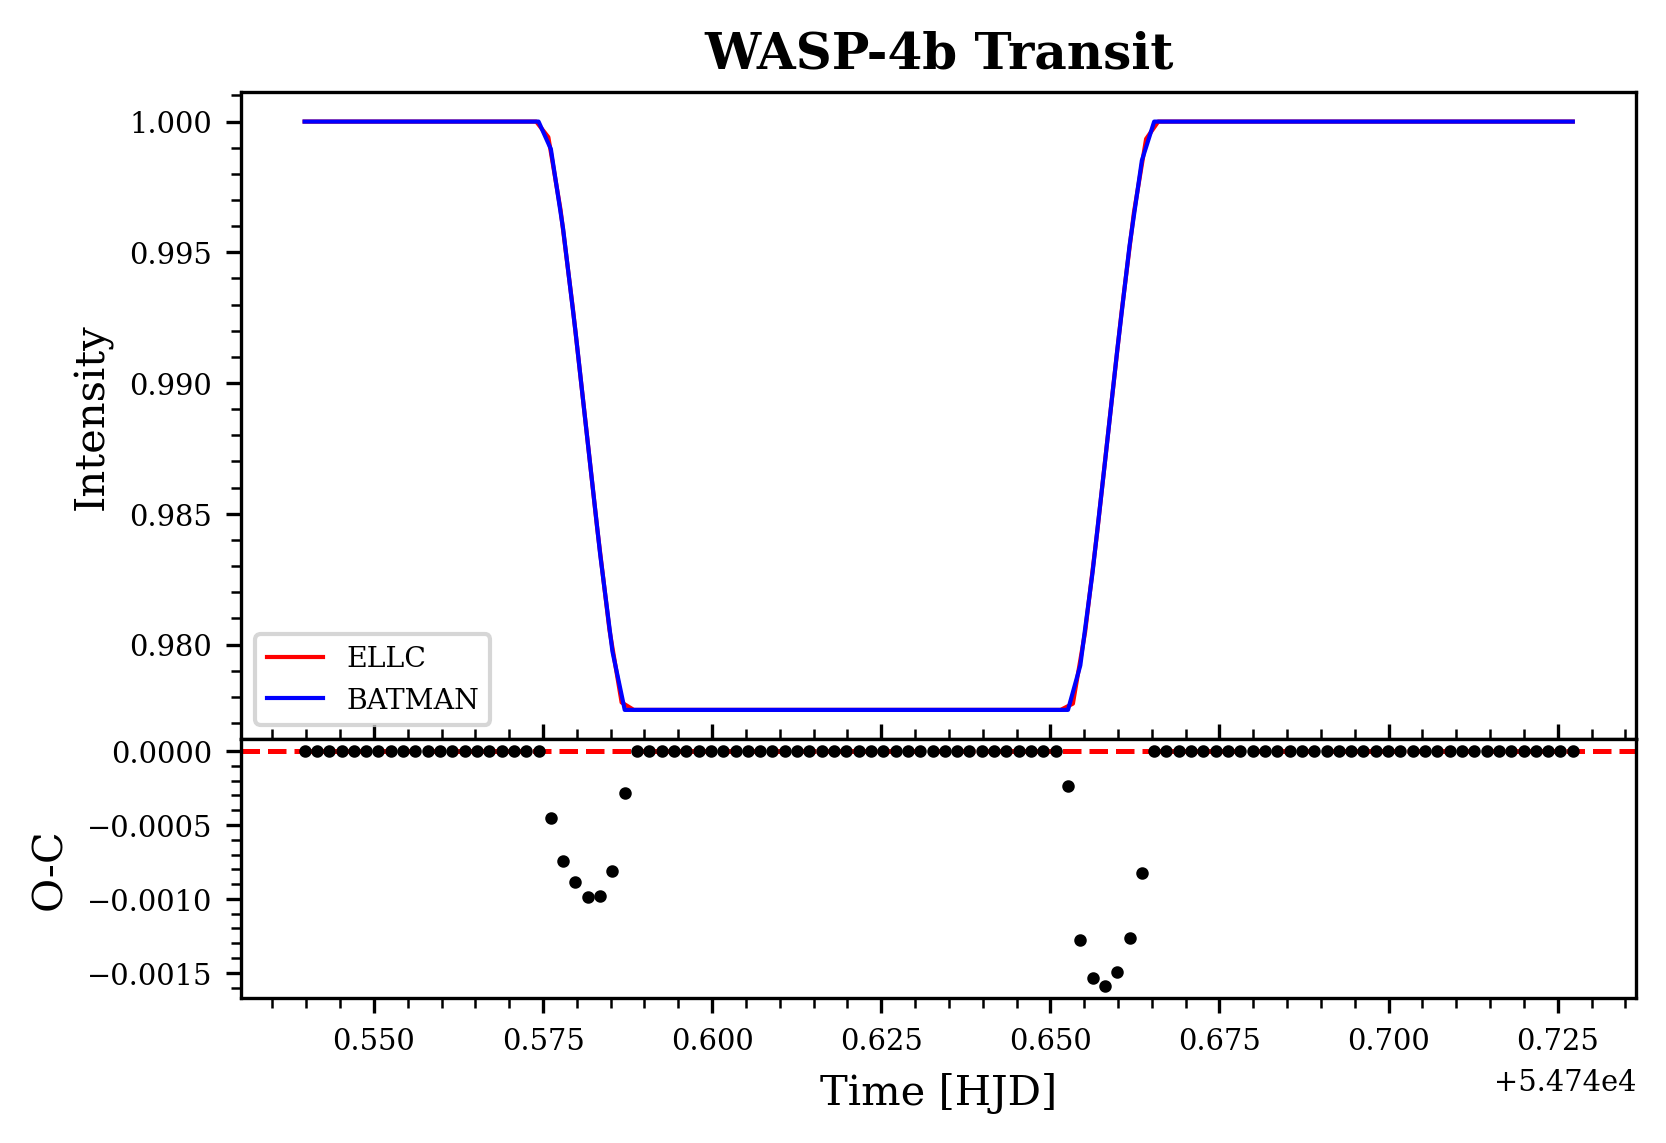

In [5]:
# Plot
f, a = plt.subplots(nrows=2, ncols=1, sharex='col', sharey=False, gridspec_kw={'height_ratios': [2, 0.8]})         
f.subplots_adjust(hspace=0)
a[0].set_title(f'WASP-4b Transit', fontweight='bold')
a[0].plot(times_wasp4_jktebop, flux_wasp4_ellc, 'r', alpha=1, lw=1, zorder=1, label="ELLC")
a[0].plot(times_wasp4_batman, flux_wasp4_batman, 'b', alpha=1, lw=1, zorder=2, label="BATMAN")
a[0].set_ylabel('Intensity')
a[0].tick_params(axis="x", which='both', direction="in")
a[0].legend(loc='best', prop={'size': 6.8})
a[1].plot(times_wasp4_batman, flux_wasp4_batman -  flux_wasp4_ellc, ls='None', marker="o", ms=2, color='black', zorder=1)
a[1].set_ylabel('O-C')
a[1].axhline(0, linestyle='--', color="red", lw=1.2, zorder=0)
a[1].set_xlabel(r'Time [HJD]')
for ax in a.flat:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', length=2.5, color='k')
plt.savefig('WASP4b_LC.png')
plt.show()

# HD-140982

In [27]:
# ----------  BATMAN Model  ----------

params_eb = batman.TransitParams()       # object to store transit parameters
params_eb.t0 = 2458651.789013            # epoch of eclipse center
params_eb.per = 1.2696257                # orbital period
params_eb.rp = 0.12845                   # planet/EB radius (in units of stellar radii)
params_eb.a = 6.5                        # semi-major axis (in units of stellar radii)
params_eb.inc = 90                       # orbital inclination (in degrees)
params_eb.ecc = 0                        # eccentricity
params_eb.w = 90                         # longitude of periastron (in degrees)
params_eb.fp = 0                         # planet-to-star flux ratio
params_eb.t_secondary = 0                # central eclipse time
params_eb.limb_dark = "quadratic"        # limb darkening model
params_eb.u = [0.038056000, 0.25594800]  # limb darkening coefficients (ExoFAST)
nint = 1336
times = np.linspace(2458651.688213, 2458651.8898130003, nint) # Total = 4.84 hrs. So, 2.42 hrs = 0.1008 days on either side of t0
m = batman.TransitModel(params_eb, times)
flux_eb_batman = m.light_curve(params_eb)

In [28]:
# ----------  ELLC Model  ----------

r_1_eb = 1/params_eb.a 
r_2_eb = r_1_eb*params_eb.rp
t_zero_eb = params_eb.t0
period_eb = params_eb.per
incl_eb = params_eb.inc
ldc_1_eb = params_eb.u 
ld_1_eb = 'quad'
sbratio_eb = 0 
flux_eb_ellc = ellc.lc(times,radius_1=r_1_eb, radius_2=r_2_eb,incl=incl_eb,sbratio=sbratio_eb,t_zero=t_zero_eb,period=period_eb,
                          ld_1=ld_1_eb, ldc_1=ldc_1_eb,shape_1='sphere',shape_2='sphere',
                          grid_1='fine',grid_2='fine')

In [29]:
diff = flux_eb_batman -  flux_eb_ellc

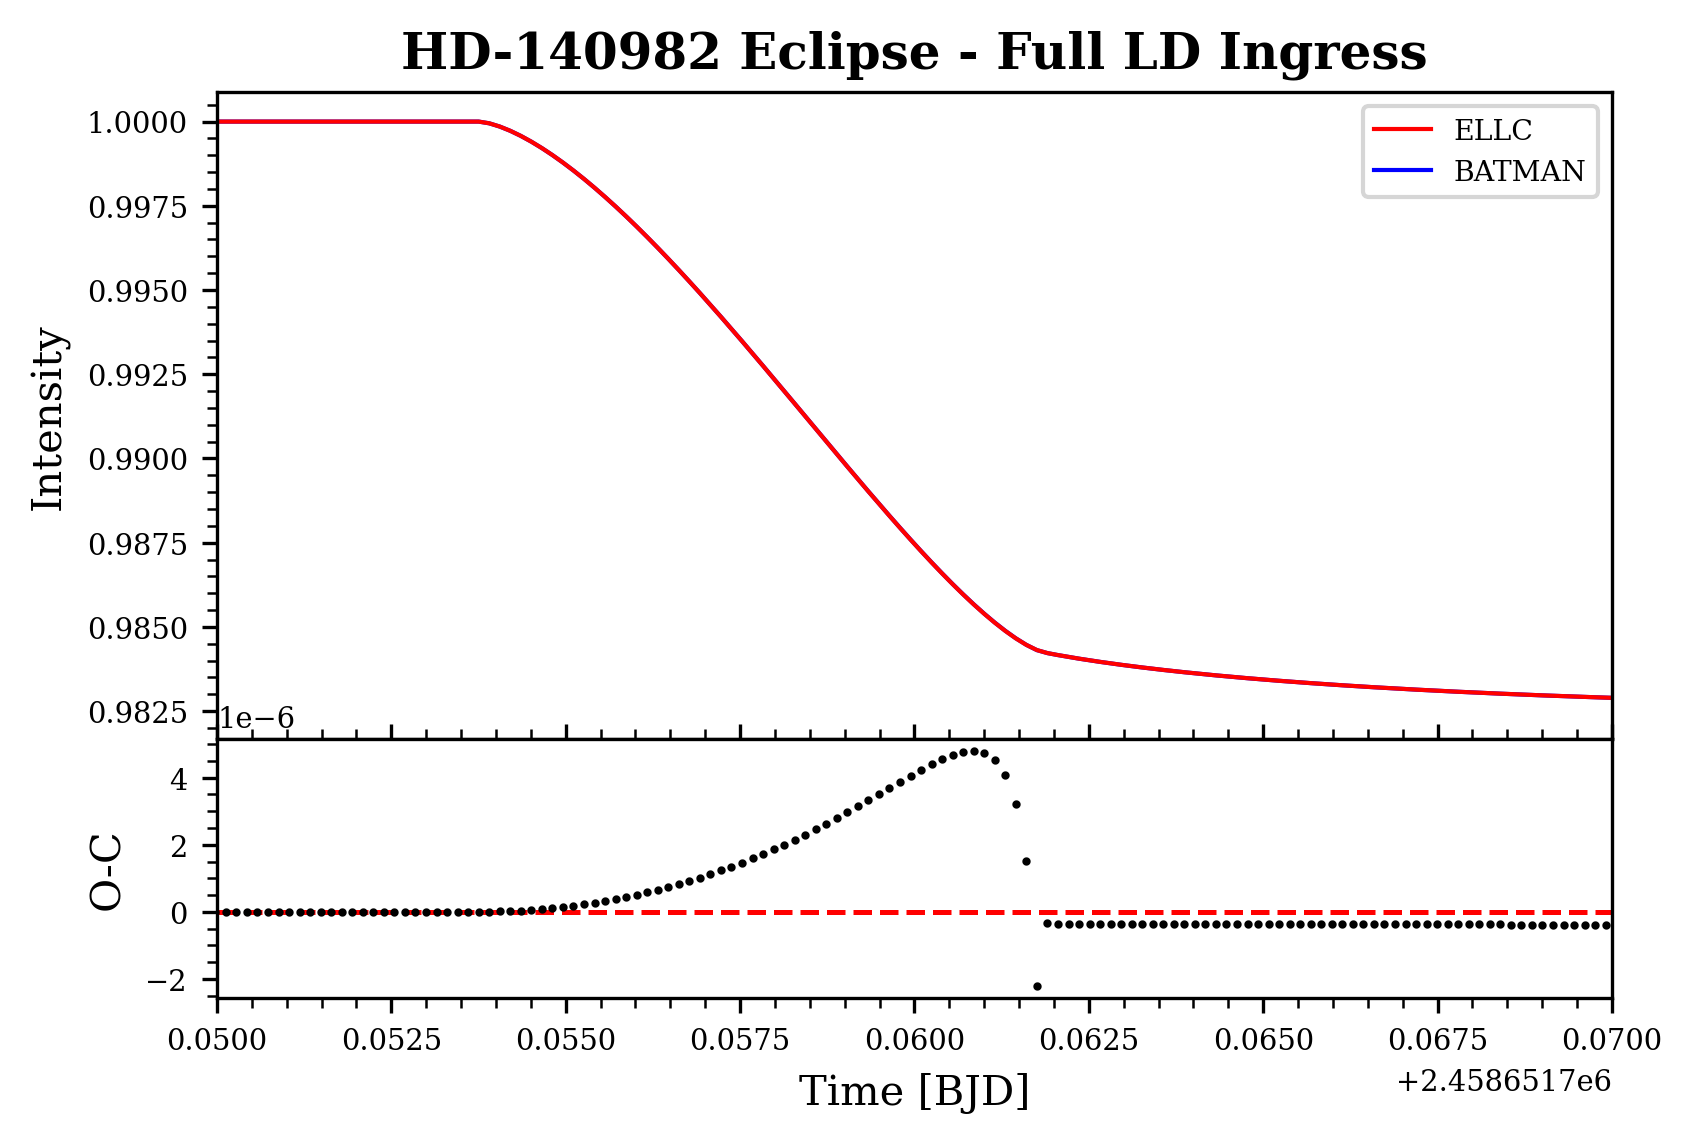

In [33]:
# Plots
f, a = plt.subplots(nrows=2, ncols=1, sharex='col', sharey=False, gridspec_kw={'height_ratios': [2, 0.8]})         
f.subplots_adjust(hspace=0)
a[0].set_title(f'HD-140982 Eclipse - Full LD Ingress', fontweight='bold')
a[0].plot(times, flux_eb_ellc, 'r', alpha=1, lw=1, zorder=2, label="ELLC")
a[0].plot(times, flux_eb_batman, 'b', alpha=1, lw=1, zorder=1, label="BATMAN")
a[0].set_ylabel('Intensity')
a[0].tick_params(axis="x", which='both', direction="in")
a[0].legend(loc='upper right', prop={'size': 6.8})
a[1].plot(times, diff, ls='None', marker=".", ms=2, color='black', zorder=1)
a[1].set_ylabel('O-C')
a[1].axhline(0, linestyle='--', color="red", lw=1.2, zorder=0)
a[1].set_xlabel(r'Time [BJD]')
for ax in a.flat:
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='minor', length=2.5, color='k')
plt.xlim(2458651.750, 2458651.770)
plt.savefig('HD-140982_FLD_Ingress.png')
plt.show()